# Hồi quy Tuyến tính đa biến (Multiple Linear Regression)

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab, này bạn sẽ có thể:

-   Sử dụng scikit-learn để triển khai Hồi quy Tuyến tính Đa biến
-   Tạo một mô hình, huấn luyện, kiểm tra và sử dụng mô hình


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Hiểu biết Dữ liệu</a></li>
        <li><a href="#reading_data">Đọc Dữ liệu vào</a></li>
        <li><a href="#multiple_regression_model">Mô hình Hồi quy đa biến</a></li>
        <li><a href="#prediction">Dự đoán</a></li>
        <li><a href="#practice">Thực hành</a></li>
    </ol>
</div>
<br>
<hr>


### Nhập các gói cần thiết


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Hiểu Dữ liệu</h2>

### `FuelConsumption.csv`:

Chúng tôi đã download tập dữ liệu tiêu thụ nhiên liệu **`FuelConsumption.csv`**, chứa xếp hạng mức tiêu thụ nhiên liệu cụ thể cho từng mẫu xe và lượng khí thải CO2 ước tính cho các loại xe hạng nhẹ bán lẻ mới ở Canada. [Nguồn tập dữ liệu](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** ví dụ: 2014
-   **MAKE** ví dụ: Acura
-   **MODEL** ví dụ: ILX
-   **VEHICLE CLASS** ví dụ: SUV
-   **ENGINE SIZE** ví dụ: 4.7
-   **CYLINDERS** ví dụ: 6
-   **TRANSMISSION** ví dụ: A6
-   **FUELTYPE** ví dụ: z
-   **FUEL CONSUMPTION in CITY(L/100 km)** ví dụ: 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** ví dụ: 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** ví dụ: 9.2
-   **CO2 EMISSIONS (g/km)** ví dụ: 182   --> low --> 0


<h2 id="reading_data">Đọc dữ liệu vào</h2>


In [ ]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Hãy chọn một số đặc trưng mà chúng ta muốn sử dụng cho hồi quy.


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

Hãy vẽ biểu đồ giá trị Emission liên quan đến Engine size:


In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Tạo tập dữ liệu train và set

Train/Test Split liên quan đến việc chia nhỏ tập dữ liệu thành training set và test set tương ứng loại trừ lẫn nhau. Sau đó, bạn huấn luyện với training set và test set.
Điều này sẽ cung cấp đánh giá chính xác hơn về độ chính xác ngoài mẫu vì tập dữ liệu testing không phải là một phần của tập dữ liệu được sử dụng để huấn luyện dữ liệu. Nó sát với các vấn đề trong thực tế hơn.

Điều này có nghĩa là chúng ta biết kết quả của từng điểm dữ liệu trong tập dữ liệu này, giúp cho việc kiểm tra trở nên tuyệt vời! Và vì dữ liệu này không được sử dụng để huấn luyện mô hình, nên mô hình không có kiến thức về kết quả của các điểm dữ liệu này. Vì vậy, về bản chất, nó thực sự là một testing ngoài mẫu.


In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Phân phối dữ liệu huấn luyện


In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Mô hình Hồi quy Đa biến</h2>


Trên thực tế, có nhiều biến dự đoán Co2emission. Khi có nhiều hơn một biến độc lập, quá trình này được gọi là hồi quy tuyến tính đa biến. Ví dụ: dự đoán co2emission sử dụng FUELCONSUMPTION_COMB, EngineSize và Cylinders của ô tô. Điều tốt ở đây là Hồi quy đa biến tuyến tính là phần mở rộng của mô hình hồi quy tuyến tính đơn giản.


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Như đã đề cập trước đây, **Hệ số** và **Hệ số chặn** là các tham số của Fit line. 
Biết rằng đó là một hồi quy tuyến tính đa biến, với 3 tham số và biết rằng các tham số là hệ số chặn và hệ số của siêu phẳng, sklearn có thể ước tính chúng từ dữ liệu. Scikit-learn chỉ sử dụng phương pháp Bình phương nhỏ nhất (OLS)  để giải quyết vấn đề này.

#### Bình phương nhỏ nhất (OLS)

OLS là một phương pháp để ước lượng các tham số chưa biết trong mô hình hồi quy tuyến tính. OLS chọn các tham số của một hàm tuyến tính của một tập các biến giải thích bằng cách tối thiểu hóa tổng bình phương sự khác biệt giữa biến phụ thuộc target và các tham số được dự đoán bởi hàm tuyến tính. Nói cách khác, nó cố gắng giảm thiểu tổng bình phương sai số (SSE) hoặc sai số toàn phương trung bình (MSE) giữa biến mục tiêu (y) và đầu ra dự đoán ($\hat{y}$) trên tất cả các mẫu trong tập dữ liệu.

OLS có thể tìm ra các tham số tốt nhất bằng cách sử dụng các phương pháp sau:

```
- Giải các tham số mô hình bằng cách sử dụng các phương trình dạng đóng
- Sử dụng thuật toán tối ưu hóa (Gradient Descent, Stochastic Gradient Descent, phương pháp Newton, ...)
```


<h2 id="prediction">Dự đoán</h2>


In [ ]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 là tốt nhất
print('Variance score: %.2f' % regr.score(x, y))

**chỉ số hồi quy explained variance:**  
Nếu $\hat{y}$ là đầu ra mục tiêu dự đoán, y là đầu ra mục tiêu (đúng) tương ứng, và Var là Variance,bình phương độ lệch chuẩn, thì explained variance được tính như sau:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  
Chỉ số tốt nhất có thể là 1.0, các giá trị thấp hơn sẽ tệ hơn.


<h2 id="practice">Thực hành</h2>
Cố gắng sử dụng một hồi quy tuyến tính đa biến với cùng một tập dữ liệu nhưng lần này sử dụng __FUEL CONSUMPTION in CITY__ và 
__FUEL CONSUMPTION in HWY__ thay vì FUELCONSUMPTION_COMB. Việc này có dẫn đến độ chính xác tốt hơn không?


In [ ]:
# Nhập code của bạn ở đây



<details><summary>Click vào đây để xem lời giải</summary>

```python
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

```

</details>


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

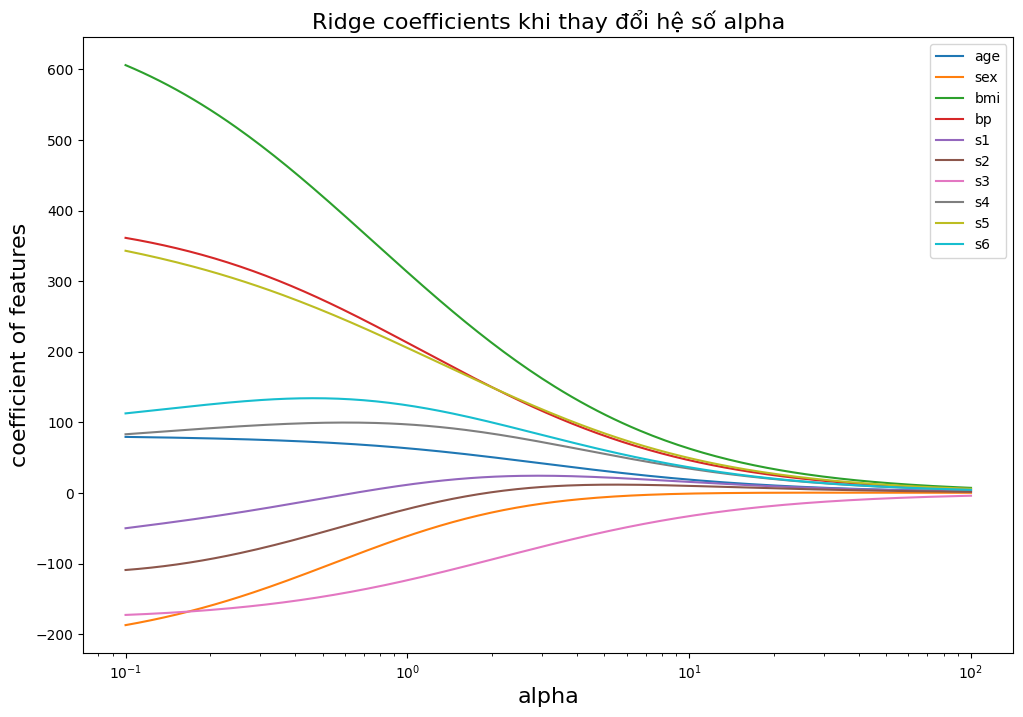

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Thay đổi alphas từ 1 --> 100
n_alphas = 200
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()